# To extract the topography for cross sections 

In [1]:
import cmocean as cmo
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.io import savemat
import xarray as xr
import scipy.interpolate
from matplotlib.lines import Line2D
import pylab as pl
import cmocean
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
# Distance along the coast (haversine)
def distance(lat1,lon1,lat2,lon2):
    '''Distance using Haversine formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d

In [3]:
outdir = '/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'
iters = np.arange(2880,3080,20)
levels=[1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
    
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels, iters=iters)
depth = ds.Depth
LAT = ds.YC.values
LON = ds.XC.values-360
Z = ds.Z.values

In [4]:
varname='WVEL'
i=1
pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'ACnoSVBdep55'+ str(2+i)+'_'+ str(3+i) +'all.nc'
dsn  = xr.open_dataset(pathn)
lon_ac=dsn.lonAC
lat_ac=dsn.latAC
distac=dsn.x

In [15]:
#hej=[58, 85, 205, 227]
hej=[220, 270, 320, 370]
p=0
dist=np.zeros((4,100))
dep=np.zeros((4,100))
for i in hej:
    p=p+1
    #ind=lat_ac[i]
    #lon=LAT[lat_ac[i]]
    lon=LAT[i]
    ind=i
    
    hFacC = ds.hFacC
    hfac = np.ma.masked_values(hFacC, 0)
    mask = np.ma.getmask(hfac)

    coast=np.where(mask[0,ind,:]==False)

    LONin = ds.XC[coast]-360
    distance=cos((lon*np.pi)/180)*111*-1*(LONin-LONin[-1])

    indlonpre=np.where(distance<=100)
    indlon=np.flip(indlonpre[0])
    #actual distance from the coast
    distpre=distance[indlon]
    dist[p-1,:len(distpre)]=distpre
    #depth 
    dep[p-1,:len(depth[ind,indlon].values)]=depth[ind,indlon].values





In [21]:
dist1=dist[0,dep[0,:]!=0]
dep1=dep[0,dep[0,:]!=0]

dist2=dist[1,dep[1,:]!=0]
dep2=dep[1,dep[1,:]!=0]

dist3=dist[2,dep[2,:]!=0]
dep3=dep[2,dep[2,:]!=0]

dist4=dist[3,dep[3,:]!=0]
dep4=dep[3,dep[3,:]!=0]

In [22]:
mdic = {"x1": dist1,"x2": dist2,"x3": dist3,"x4": dist4, "d1":dep1, "d2":dep2, "d3":dep3, "d4":dep4 }
savemat("BT_domainORG_ctw.mat", mdic)

In [27]:
params = {'font.size': 22,
          'figure.figsize': (30, 15),
         'font.family':'serif'}
pl.rcParams.update(params)


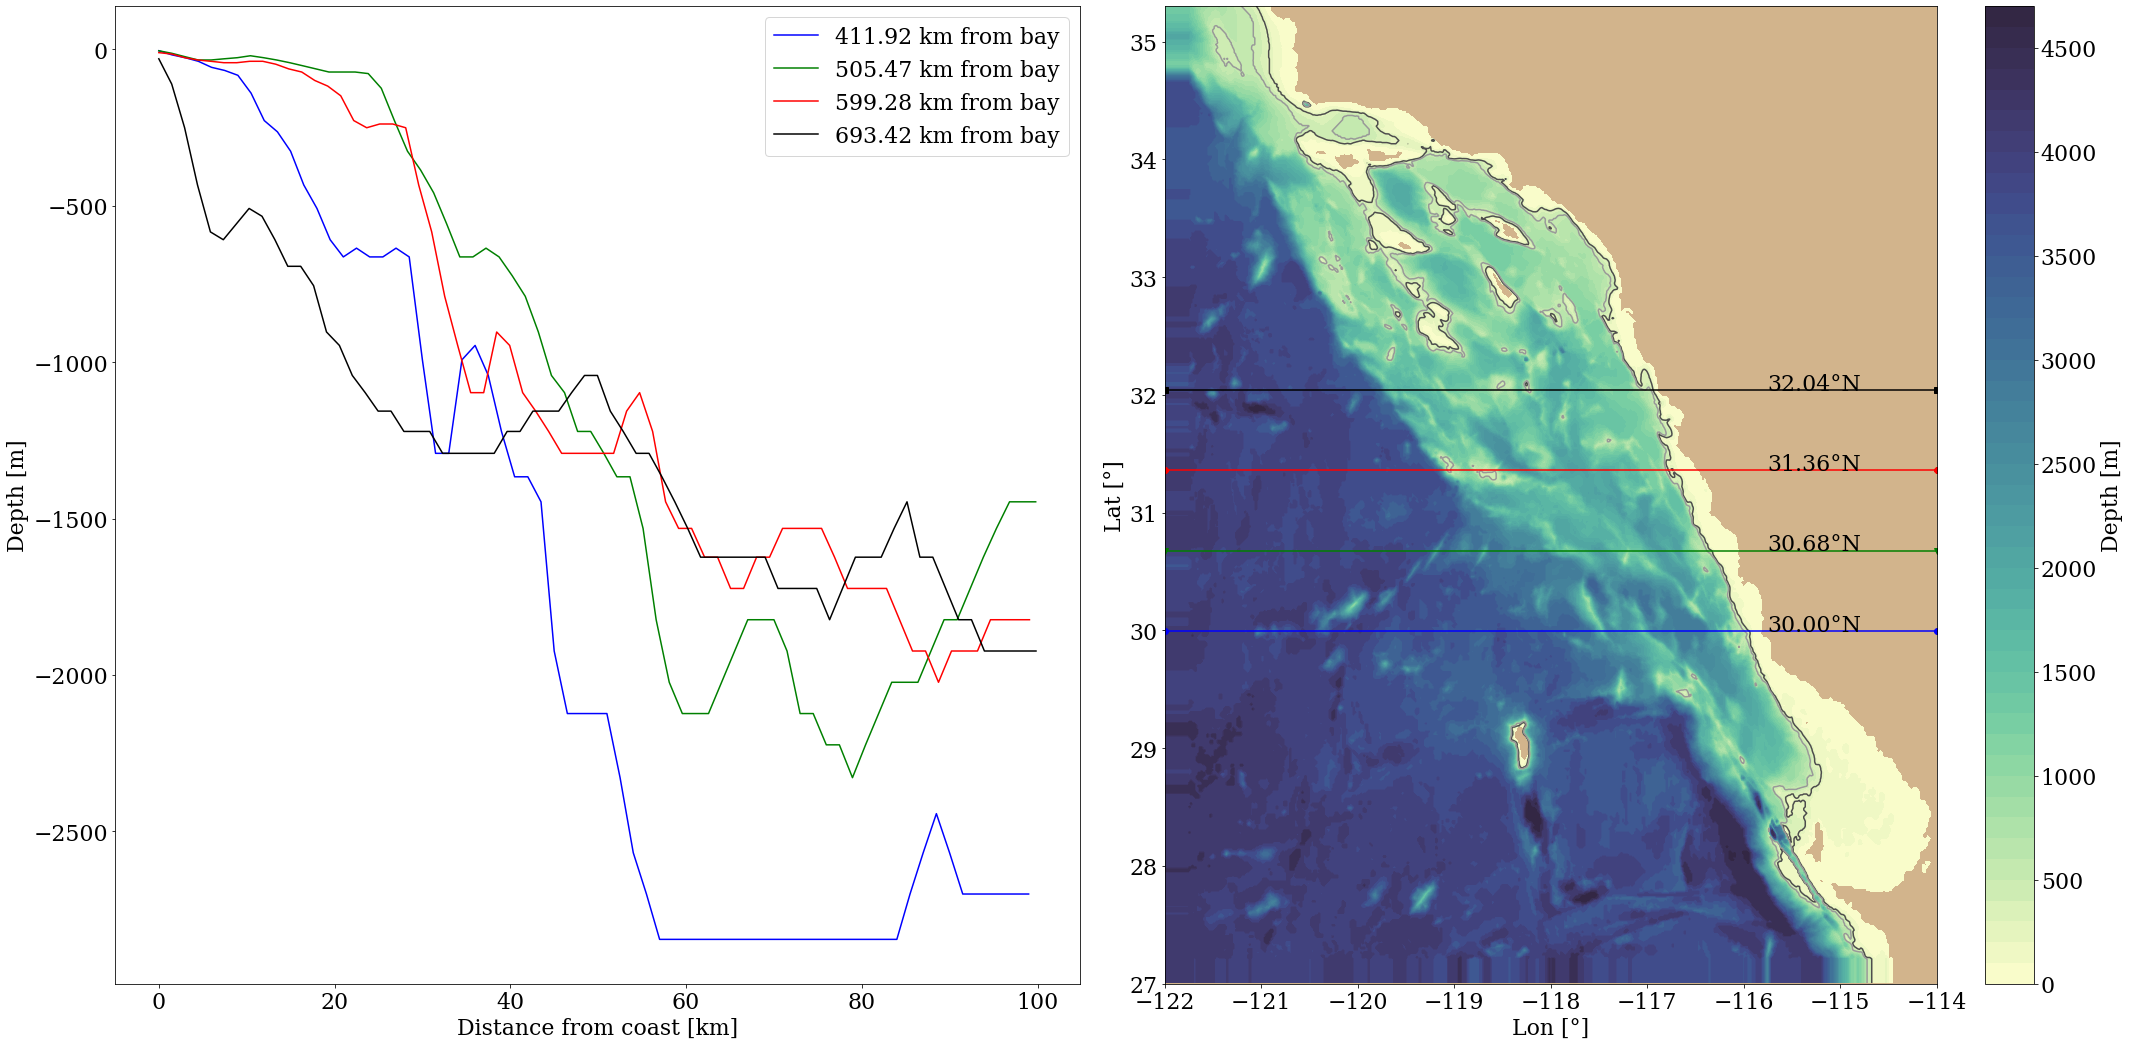

In [28]:
fig = plt.figure()
gs = GridSpec(nrows=1, ncols=2)#, height_ratios=[1,1])

lines=0
cbarall=0
#hej=[58, 85, 111, 125, 130, 205, 227,267, 299, 360,405]
#hej=[58, 85, 205, 227]
hej=[220, 270, 320, 370]
Wmin=-0.000003
Wmax=0.000003
markers=Line2D.filled_markers
markers=np.delete(markers,np.arange(2,5,1))
colors=['b','g','r','k','m','c','y','brown','lime','fuchsia','beige']

ax0 = fig.add_subplot(gs[0, 0])
for i in np.arange(0,4,1):
    ax0.plot(dist[i,dep[i,:]!=0],-dep[i,dep[i,:]!=0], label=f'{distac[hej[i]].values:.2f} km from bay', color=colors[i])

ax3 = fig.add_subplot(gs[0,1])
ax3.set_facecolor('tan')
pc = ax3.contourf(LON,LAT,np.ma.masked_array(depth, mask=mask[0,:,:]),50,
                 vmin=0, vmax=5000, cmap=cmocean.cm.deep)#, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax3.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])
p=0
for i in hej:
    p=p+1
    #ind=lat_ac[i]
    ind=i
    ax3.axhline(y=LAT[ind],color=colors[p-1],marker=markers[p-1])
    ax3.annotate(f'{LAT[ind]:.2f}°N',(LON[400],LAT[ind]),color='k') 
#p=0
#for ii,jj in zip(lon_ac[hej],lat_ac[hej]):
 #   p=p+1
  #  ax3.plot(LON[ii-1],LAT[jj-1],marker=markers[p-1], 
   #         markersize=18, color=colors[p-1])

#for ii,jj in zip(lon_of_shelf.astype(int),lat_coast):

 #   ax3.plot(LON[ii],LAT[jj],'o', 
  #          markersize=4, color='r')
    


cb.set_label('Depth [m]')
ax3.set_xlabel('Lon [°]')
ax3.set_ylabel('Lat [°]')
ax3.set_xlim(238-360, 246-360)
ax3.set_ylim(27,35.3)
#ax3.set_aspect(1)
fig.tight_layout()

ax0.set_xlabel('Distance from coast [km]')
ax0.set_ylabel('Depth [m]')
ax0.legend()